<h1>Assignment 8<h1>

In [38]:
from bs4 import BeautifulSoup 

#importing Dash Cytoscape
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
from networkx.algorithms.community import greedy_modularity_communities

In [23]:
_send_jupyter_config_comm_request()

In [25]:
JupyterDash.infer_jupyter_proxy_config()

In [4]:
#importing "A Midsummer Night's Dream"
import requests 
response = requests.get('https://shakespeare.folger.edu/downloads/txt/a-midsummer-nights-dream_TXT_FolgerShakespeare.txt') 

In [5]:
response

<Response [200]>

In [6]:
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [7]:
print(document.get_text()) 

A Midsummer Night's Dream
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/a-midsummer-nights-dream/
Created on Jul 31, 2015, from FDT version 0.9.2

Characters in the Play
Four lovers:
  HERMIA
  LYSANDER
  HELENA
  DEMETRIUS
THESEUS, duke of Athens
HIPPOLYTA, queen of the Amazons
EGEUS, father to Hermia
PHILOSTRATE, master of the revels to Theseus
NICK BOTTOM, weaver
PETER QUINCE, carpenter
FRANCIS FLUTE, bellows-mender
TOM SNOUT, tinker
SNUG, joiner
ROBIN STARVELING, tailor
OBERON, king of the Fairies
TITANIA, queen of the Fairies
ROBIN GOODFELLOW, a "puck," or hobgoblin, in Oberon's service
A FAIRY, in the service of Titania
Fairies attending upon Titania:
  PEASEBLOSSOM
  COBWEB
  MOTE
  MUSTARDSEED
Lords and Attendants on Theseus and Hippolyta
Other Fairies in the trains of Titania and Oberon


ACT 1
=====

Scene 1
[Enter Theseus, Hippolyta, and 

In [8]:
x = document.get_text()

In [9]:
x

'A Midsummer Night\'s Dream\r\nby William Shakespeare\r\nEdited by Barbara A. Mowat and Paul Werstine\r\n  with Michael Poston and Rebecca Niles\r\nFolger Shakespeare Library\r\nhttps://shakespeare.folger.edu/shakespeares-works/a-midsummer-nights-dream/\r\nCreated on Jul 31, 2015, from FDT version 0.9.2\r\n\r\nCharacters in the Play\r\n======================\r\nFour lovers:\r\n  HERMIA\r\n  LYSANDER\r\n  HELENA\r\n  DEMETRIUS\r\nTHESEUS, duke of Athens\r\nHIPPOLYTA, queen of the Amazons\r\nEGEUS, father to Hermia\r\nPHILOSTRATE, master of the revels to Theseus\r\nNICK BOTTOM, weaver\r\nPETER QUINCE, carpenter\r\nFRANCIS FLUTE, bellows-mender\r\nTOM SNOUT, tinker\r\nSNUG, joiner\r\nROBIN STARVELING, tailor\r\nOBERON, king of the Fairies\r\nTITANIA, queen of the Fairies\r\nROBIN GOODFELLOW, a "puck," or hobgoblin, in Oberon\'s service\r\nA FAIRY, in the service of Titania\r\nFairies attending upon Titania:\r\n  PEASEBLOSSOM\r\n  COBWEB\r\n  MOTE\r\n  MUSTARDSEED\r\nLords and Attendants o

In [10]:
acts = x.split('ACT')

In [11]:
#creatingcharacter list
characters = [ 
    'HERMIA',
    'LYSANDER',
    'HELENA',
    'DEMETRIUS',
    'THESEUS',
    'HIPPOLYTA',
    'EGEUS',
    'PHILOSTRATE',
    'NICK BOTTOM',
    'PETER QUINCE',
    'FRANCIS FLUTE',
    'TOM SNOUT',
    'SNUG',
    'ROBIN STARVELING',
    'OBERON',
    'TITANIA',
    'ROBIN GOODFELLOW',
    'FAIRY',
    'PEASEBLOSSOM',
    'COBWEB',
    'MOTE',
    'MUSTARDSEED',
    'BOTTOM',
    'FLUTE',
    'QUINCE',
    'ROBIN',
    'STARVELING'
]

In [12]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('Scene')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [13]:
charnum

{'HERMIA': 4,
 'LYSANDER': 5,
 'HELENA': 5,
 'DEMETRIUS': 6,
 'THESEUS': 3,
 'HIPPOLYTA': 3,
 'EGEUS': 2,
 'PHILOSTRATE': 1,
 'NICK BOTTOM': 0,
 'PETER QUINCE': 0,
 'FRANCIS FLUTE': 0,
 'TOM SNOUT': 0,
 'SNUG': 3,
 'ROBIN STARVELING': 0,
 'OBERON': 5,
 'TITANIA': 5,
 'ROBIN GOODFELLOW': 0,
 'FAIRY': 2,
 'PEASEBLOSSOM': 2,
 'COBWEB': 2,
 'MOTE': 1,
 'MUSTARDSEED': 2,
 'BOTTOM': 5,
 'FLUTE': 4,
 'QUINCE': 4,
 'ROBIN': 6,
 'STARVELING': 4}

In [14]:
connections

{('HERMIA', 'LYSANDER'): 4,
 ('HERMIA', 'HELENA'): 4,
 ('HERMIA', 'DEMETRIUS'): 4,
 ('HERMIA', 'THESEUS'): 2,
 ('HERMIA', 'HIPPOLYTA'): 2,
 ('HERMIA', 'EGEUS'): 2,
 ('HERMIA', 'PHILOSTRATE'): 0,
 ('HERMIA', 'NICK BOTTOM'): 0,
 ('HERMIA', 'PETER QUINCE'): 0,
 ('HERMIA', 'FRANCIS FLUTE'): 0,
 ('HERMIA', 'TOM SNOUT'): 0,
 ('HERMIA', 'SNUG'): 0,
 ('HERMIA', 'ROBIN STARVELING'): 0,
 ('HERMIA', 'OBERON'): 3,
 ('HERMIA', 'TITANIA'): 2,
 ('HERMIA', 'ROBIN GOODFELLOW'): 0,
 ('HERMIA', 'FAIRY'): 1,
 ('HERMIA', 'PEASEBLOSSOM'): 1,
 ('HERMIA', 'COBWEB'): 1,
 ('HERMIA', 'MOTE'): 0,
 ('HERMIA', 'MUSTARDSEED'): 1,
 ('HERMIA', 'BOTTOM'): 1,
 ('HERMIA', 'FLUTE'): 0,
 ('HERMIA', 'QUINCE'): 0,
 ('HERMIA', 'ROBIN'): 3,
 ('HERMIA', 'STARVELING'): 0,
 ('LYSANDER', 'HELENA'): 4,
 ('LYSANDER', 'DEMETRIUS'): 5,
 ('LYSANDER', 'THESEUS'): 3,
 ('LYSANDER', 'HIPPOLYTA'): 3,
 ('LYSANDER', 'EGEUS'): 2,
 ('LYSANDER', 'PHILOSTRATE'): 1,
 ('LYSANDER', 'NICK BOTTOM'): 0,
 ('LYSANDER', 'PETER QUINCE'): 0,
 ('LYSANDER', '

In [15]:
for k,v in charnum.items():
    print(k,v)

HERMIA 4
LYSANDER 5
HELENA 5
DEMETRIUS 6
THESEUS 3
HIPPOLYTA 3
EGEUS 2
PHILOSTRATE 1
NICK BOTTOM 0
PETER QUINCE 0
FRANCIS FLUTE 0
TOM SNOUT 0
SNUG 3
ROBIN STARVELING 0
OBERON 5
TITANIA 5
ROBIN GOODFELLOW 0
FAIRY 2
PEASEBLOSSOM 2
COBWEB 2
MOTE 1
MUSTARDSEED 2
BOTTOM 5
FLUTE 4
QUINCE 4
ROBIN 6
STARVELING 4


In [16]:
#creating all nodes which are going to be characters
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
graphitems

[{'data': {'id': 'HERMIA', 'label': 'Hermia', 'size': '4'}},
 {'data': {'id': 'LYSANDER', 'label': 'Lysander', 'size': '5'}},
 {'data': {'id': 'HELENA', 'label': 'Helena', 'size': '5'}},
 {'data': {'id': 'DEMETRIUS', 'label': 'Demetrius', 'size': '6'}},
 {'data': {'id': 'THESEUS', 'label': 'Theseus', 'size': '3'}},
 {'data': {'id': 'HIPPOLYTA', 'label': 'Hippolyta', 'size': '3'}},
 {'data': {'id': 'EGEUS', 'label': 'Egeus', 'size': '2'}},
 {'data': {'id': 'PHILOSTRATE', 'label': 'Philostrate', 'size': '1'}},
 {'data': {'id': 'NICK BOTTOM', 'label': 'Nick Bottom', 'size': '0'}},
 {'data': {'id': 'PETER QUINCE', 'label': 'Peter Quince', 'size': '0'}},
 {'data': {'id': 'FRANCIS FLUTE', 'label': 'Francis Flute', 'size': '0'}},
 {'data': {'id': 'TOM SNOUT', 'label': 'Tom Snout', 'size': '0'}},
 {'data': {'id': 'SNUG', 'label': 'Snug', 'size': '3'}},
 {'data': {'id': 'ROBIN STARVELING',
   'label': 'Robin Starveling',
   'size': '0'}},
 {'data': {'id': 'OBERON', 'label': 'Oberon', 'size': '5

In [17]:
#creating all edges which are the amount of times they are in a scene together
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems

[{'data': {'id': 'HERMIA', 'label': 'Hermia', 'size': '4'}},
 {'data': {'id': 'LYSANDER', 'label': 'Lysander', 'size': '5'}},
 {'data': {'id': 'HELENA', 'label': 'Helena', 'size': '5'}},
 {'data': {'id': 'DEMETRIUS', 'label': 'Demetrius', 'size': '6'}},
 {'data': {'id': 'THESEUS', 'label': 'Theseus', 'size': '3'}},
 {'data': {'id': 'HIPPOLYTA', 'label': 'Hippolyta', 'size': '3'}},
 {'data': {'id': 'EGEUS', 'label': 'Egeus', 'size': '2'}},
 {'data': {'id': 'PHILOSTRATE', 'label': 'Philostrate', 'size': '1'}},
 {'data': {'id': 'NICK BOTTOM', 'label': 'Nick Bottom', 'size': '0'}},
 {'data': {'id': 'PETER QUINCE', 'label': 'Peter Quince', 'size': '0'}},
 {'data': {'id': 'FRANCIS FLUTE', 'label': 'Francis Flute', 'size': '0'}},
 {'data': {'id': 'TOM SNOUT', 'label': 'Tom Snout', 'size': '0'}},
 {'data': {'id': 'SNUG', 'label': 'Snug', 'size': '3'}},
 {'data': {'id': 'ROBIN STARVELING',
   'label': 'Robin Starveling',
   'size': '0'}},
 {'data': {'id': 'OBERON', 'label': 'Oberon', 'size': '5

In [26]:
#generating the network graphic of the characters in play
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/jack.witherspoon@yahoo.com/proxy/8050/


In [27]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
    )
])

app.run_server(debug=True)

/opt/conda/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()


Dash app running on https://jupyter.idre.ucla.edu/user/jack.witherspoon@yahoo.com/proxy/8050/


In [28]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'blue',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(str(int(weight)/10))',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/jack.witherspoon@yahoo.com/proxy/8050/


In [29]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)

5


In [30]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'red',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/jack.witherspoon@yahoo.com/proxy/8050/


In [32]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('HERMIA', 'LYSANDER'),
 ('HERMIA', 'HELENA'),
 ('HERMIA', 'DEMETRIUS'),
 ('HERMIA', 'THESEUS'),
 ('HERMIA', 'HIPPOLYTA'),
 ('HERMIA', 'EGEUS'),
 ('HERMIA', 'OBERON'),
 ('HERMIA', 'TITANIA'),
 ('HERMIA', 'FAIRY'),
 ('HERMIA', 'PEASEBLOSSOM'),
 ('HERMIA', 'COBWEB'),
 ('HERMIA', 'MUSTARDSEED'),
 ('HERMIA', 'BOTTOM'),
 ('HERMIA', 'ROBIN'),
 ('LYSANDER', 'HELENA'),
 ('LYSANDER', 'DEMETRIUS'),
 ('LYSANDER', 'THESEUS'),
 ('LYSANDER', 'HIPPOLYTA'),
 ('LYSANDER', 'EGEUS'),
 ('LYSANDER', 'PHILOSTRATE'),
 ('LYSANDER', 'SNUG'),
 ('LYSANDER', 'OBERON'),
 ('LYSANDER', 'TITANIA'),
 ('LYSANDER', 'FAIRY'),
 ('LYSANDER', 'PEASEBLOSSOM'),
 ('LYSANDER', 'COBWEB'),
 ('LYSANDER', 'MUSTARDSEED'),
 ('LYSANDER', 'BOTTOM'),
 ('LYSANDER', 'FLUTE'),
 ('LYSANDER', 'QUINCE'),
 ('LYSANDER', 'ROBIN'),
 ('LYSANDER', 'STARVELING'),
 ('HELENA', 'DEMETRIUS'),
 ('HELENA', 'THESEUS'),
 ('HELENA', 'HIPPOLYTA'),
 ('HELENA', 'EGEUS'),
 ('HELENA', 'OBERON'),
 ('HELENA', 'TITANIA'),
 ('HELENA', 'FAIRY'),
 ('HELENA', 'PEASEBLO

In [33]:
G = nx.Graph()

In [34]:
G.add_edges_from(nxgraphitems)

In [35]:
G.nodes

NodeView(('HERMIA', 'LYSANDER', 'HELENA', 'DEMETRIUS', 'THESEUS', 'HIPPOLYTA', 'EGEUS', 'OBERON', 'TITANIA', 'FAIRY', 'PEASEBLOSSOM', 'COBWEB', 'MUSTARDSEED', 'BOTTOM', 'ROBIN', 'PHILOSTRATE', 'SNUG', 'FLUTE', 'QUINCE', 'STARVELING', 'MOTE'))

In [36]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Titania        : 1.000
Robin          : 1.000
Lysander       : 0.950
Demetrius      : 0.950
Oberon         : 0.950
Bottom         : 0.950
Theseus        : 0.900
Hippolyta      : 0.900
Peaseblossom   : 0.850
Cobweb         : 0.850
Mustardseed    : 0.850
Flute          : 0.800
Quince         : 0.800
Starveling     : 0.800
Hermia         : 0.700
Helena         : 0.700
Egeus          : 0.650
Philostrate    : 0.600
Snug           : 0.600
Mote           : 0.450
Fairy          : 0.350


In [37]:
nx.density(G)

0.7904761904761904

In [39]:
greedy_modularity_communities(G)

[frozenset({'COBWEB',
            'DEMETRIUS',
            'EGEUS',
            'FAIRY',
            'HELENA',
            'HERMIA',
            'LYSANDER',
            'MUSTARDSEED',
            'OBERON',
            'PEASEBLOSSOM',
            'TITANIA'}),
 frozenset({'BOTTOM',
            'FLUTE',
            'HIPPOLYTA',
            'MOTE',
            'PHILOSTRATE',
            'QUINCE',
            'ROBIN',
            'SNUG',
            'STARVELING',
            'THESEUS'})]

In [40]:
communities = greedy_modularity_communities(G)



In [41]:
modularity_class = {}

for community_number, community in enumerate(communities):

    for name in community:
        modularity_class[name] = community_number

In [42]:
 modularity_class

{'COBWEB': 0,
 'LYSANDER': 0,
 'HERMIA': 0,
 'OBERON': 0,
 'PEASEBLOSSOM': 0,
 'MUSTARDSEED': 0,
 'EGEUS': 0,
 'DEMETRIUS': 0,
 'FAIRY': 0,
 'HELENA': 0,
 'TITANIA': 0,
 'MOTE': 1,
 'QUINCE': 1,
 'BOTTOM': 1,
 'SNUG': 1,
 'HIPPOLYTA': 1,
 'STARVELING': 1,
 'THESEUS': 1,
 'FLUTE': 1,
 'PHILOSTRATE': 1,
 'ROBIN': 1}

[['COBWEB', 'LYSANDER', 'HERMIA', 'OBERON', 'PEASEBLOSSOM', 'MUSTARDSEED', 'EGEUS', 'DEMETRIUS', 'FAIRY', 'HELENA', 'TITANIA'], ['MOTE', 'QUINCE', 'BOTTOM', 'SNUG', 'HIPPOLYTA', 'STARVELING', 'THESEUS', 'FLUTE', 'PHILOSTRATE', 'ROBIN']]


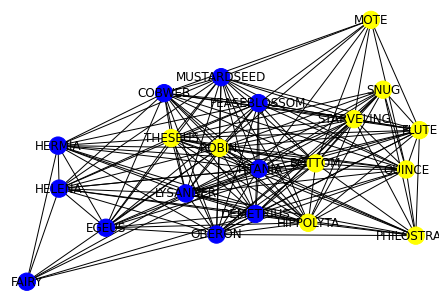

In [43]:
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [44]:
graphitems = []

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'green'
    else:
        modularity = 'red'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

5


[{'data': {'id': 'HERMIA',
   'label': 'Hermia',
   'size': '4',
   'modularity': 'blue'}},
 {'data': {'id': 'LYSANDER',
   'label': 'Lysander',
   'size': '5',
   'modularity': 'blue'}},
 {'data': {'id': 'HELENA',
   'label': 'Helena',
   'size': '5',
   'modularity': 'blue'}},
 {'data': {'id': 'DEMETRIUS',
   'label': 'Demetrius',
   'size': '6',
   'modularity': 'blue'}},
 {'data': {'id': 'THESEUS',
   'label': 'Theseus',
   'size': '3',
   'modularity': 'green'}},
 {'data': {'id': 'HIPPOLYTA',
   'label': 'Hippolyta',
   'size': '3',
   'modularity': 'green'}},
 {'data': {'id': 'EGEUS',
   'label': 'Egeus',
   'size': '2',
   'modularity': 'blue'}},
 {'data': {'id': 'PHILOSTRATE',
   'label': 'Philostrate',
   'size': '1',
   'modularity': 'green'}},
 {'data': {'id': 'NICK BOTTOM',
   'label': 'Nick Bottom',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'PETER QUINCE',
   'label': 'Peter Quince',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'FRANCIS FLUTE

In [45]:
app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/jack.witherspoon@yahoo.com/proxy/8050/


/opt/conda/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()
